![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview and Business Problem

For the second phase of Flatiron's Live Data Science program we were tasked with developing a multiple linear regression model. This model would predict the price of houses in King County, Washington using data from the King County reality dataset. We decided to develop this model for a small realty business named "Mom and Pop Reality". The goal is to provide an accurate prediction for the price of their client's home before puttting it on the market. Client's will always want to get the most money for their home possible. However, realty firms will quickly find themselves with a poor reputation and out of business if a they are misleading or dishonest in their assessed target price. Assuming the firm is acting on good faith and want to provide an accurate assessment, their prediction model must be flexible to the market to continue being competitive in the market place. <br><br>
With these concerns in mind, we set out to explore the features in the data set to design our model, explore correlations between different features and the sale price of the home, and use the features with strong correlations to develop a model to achieve our goal. We made sure to normalize our data using a log transformation and scale our data for consistent analysis. As we concluded our analysis, we discovered the most important features to predicting sale price was the size of the home, the size of the lot, the number of bedrooms, and the condition and grade of the home. We recommend Mom & Pop Realty take these features into consideration when assessing the values of client's homes. 

## Data Understanding

This dataset contains house sale prices for King County,Washington. It includes homes sold between May 2014 and May 2015. The data was gathered from King County GIS Open Data. The data represents different features of homes in King County. The data is widely varied, as is to be expected. The data states when the house was built and if it was renovated as well as the date of sale. The data includes counts on floors, bathrooms and bedrooms. Also included in grade and condition of the home. The data also includes waterfront property designation and data on view on different landmarks from the property. The data inlcudes information on basement, living and lot area. The data also includes information regarding living and lot area of the closest 15 properties. Additionally, there is also locational data including zip code and latitude and longitudinal of teh property. Using these features our target variable will be the sale price of the home. We are targeting categorical data in the grade and condition of the homes. We have ordinal data in the number of bedrooms amd continuous data in the hoem and lot size.

In [138]:
# import relevant libraries
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols

ModuleNotFoundError: No module named 'utils'

## Exploring the data

In [28]:
#what data types are in the data?
data = pd.read_csv('../../data/kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [21]:
# looking for any null values in the data.
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [29]:
#dropping duplicates from the data set based on their id value.
data.drop_duplicates(subset='id', inplace=True)

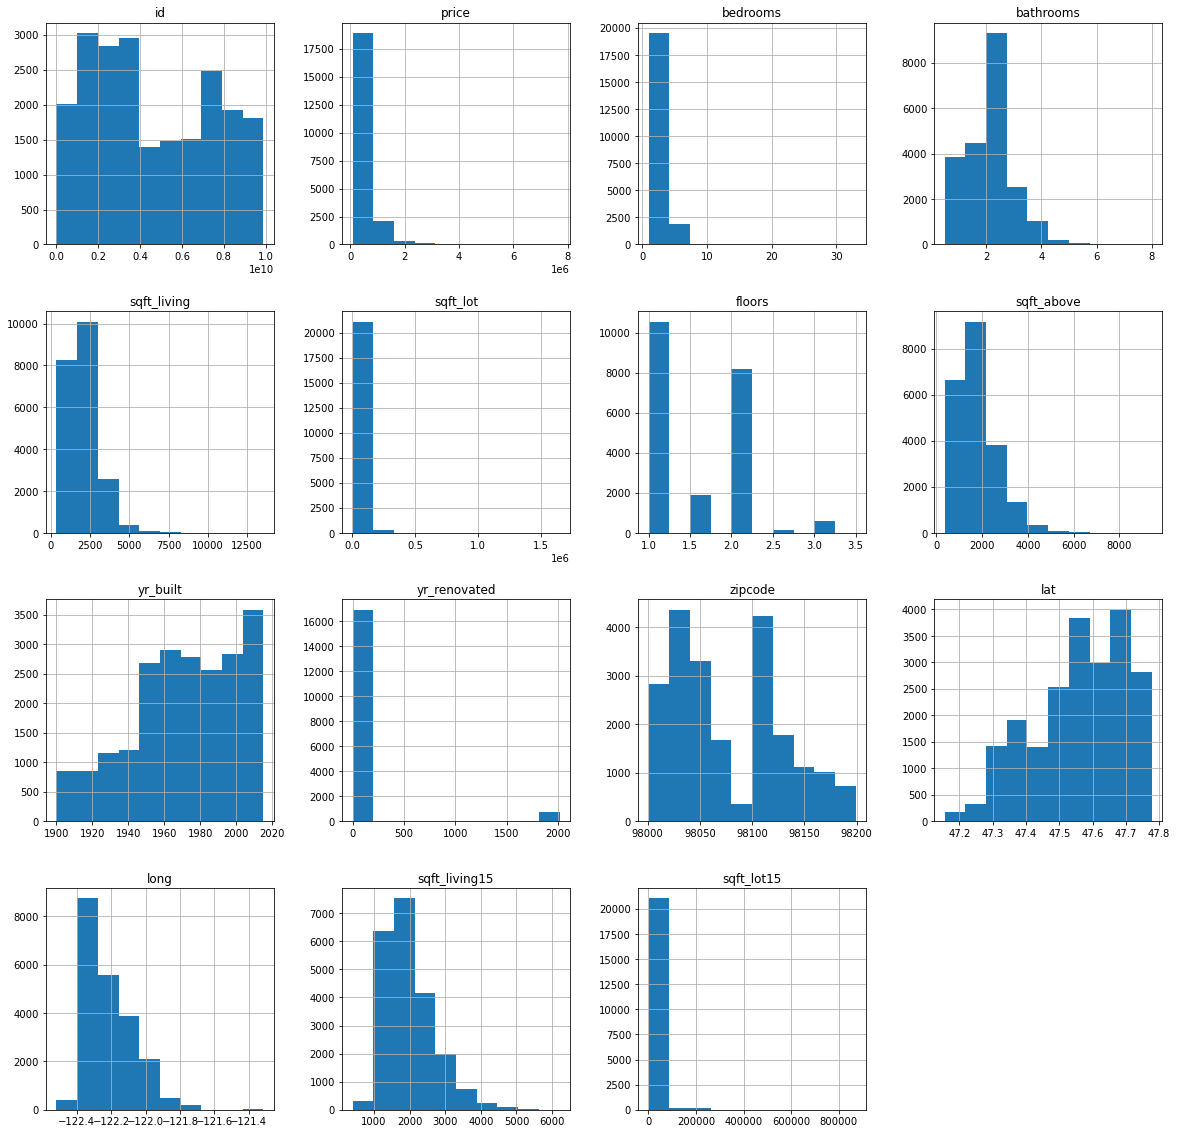

In [5]:
#exploring the distribution of the features
data.hist(figsize=(20,20));

Some of these features look like they could use some log processing. Running a log transformation will help normalize the data for better analysis.

In [44]:
#cheking the new dataframe inforation
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21419
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21420 non-null  float64
 1   price_log        21420 non-null  float64
 2   grade            21420 non-null  object 
 3   condition        21420 non-null  object 
 4   view             21357 non-null  object 
 5   sqft_living      21420 non-null  int64  
 6   sqft_living_log  21420 non-null  float64
 7   sqft_lot         21420 non-null  int64  
 8   sqft_lot_log     21420 non-null  float64
 9   sqft_above       21420 non-null  int64  
 10  sqft_above_log   21420 non-null  float64
 11  sqft_basement    21420 non-null  float64
 12  bedrooms         21420 non-null  int64  
 13  bathrooms        21420 non-null  float64
 14  floors           21420 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 2.6+ MB


In [45]:
#looking at some statistical information of the dataframe columms
data.describe()

,price,price_log,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,sqft_basement,bedrooms,bathrooms,floors
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,13.048915,2083.132633,7.552148,1.512804e+04,8.989676,1791.170215,7.396578,285.904342,3.373950,2.118429,1.495985
std,3.679311e+05,0.526726,918.808412,0.424047,4.153080e+04,0.903854,828.692965,0.427241,440.008202,0.925405,0.768720,0.540081
min,7.800000e+04,11.264464,370.000000,5.913503,5.200000e+02,6.253829,370.000000,5.913503,0.000000,1.000000,0.500000,1.000000
25%,3.225000e+05,12.683858,1430.000000,7.265430,5.040000e+03,8.525161,1200.000000,7.090077,0.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,13.017003,1920.000000,7.560080,7.614000e+03,8.937744,1560.000000,7.352441,0.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,13.377006,2550.000000,7.843849,1.069050e+04,9.277111,2220.000000,7.705262,550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,15.856731,13540.000000,9.513404,1.651359e+06,14.317109,9410.000000,9.149528,4820.000000,33.000000,8.000000,3.500000


In [850]:
# looking at the top 15 properties according to each feature
for col in data.columns:
    print(f'\n{col}:\n')
    print(data.sort_values(by=col,ascending=False).head(15))


price:

           price  price_log         grade condition  sqft_living  \
7187   7700000.0  15.856731    13 Mansion      Good        12050   
3877   7060000.0  15.769956  11 Excellent   Average        10040   
9170   6890000.0  15.745582    13 Mansion   Average         9890   
4371   5570000.0  15.532906    13 Mansion   Average         9200   
1434   5350000.0  15.492607     12 Luxury   Average         8000   
1301   5300000.0  15.483217     12 Luxury      Good         7390   
1152   5110000.0  15.446710     12 Luxury   Average         8010   
8023   4670000.0  15.356670     12 Luxury   Average         9640   
2601   4500000.0  15.319588     12 Luxury   Average         6640   
8560   4490000.0  15.317363     12 Luxury   Average         6430   
12249  4210000.0  15.252973     12 Luxury   Average         7440   
4110   4000000.0  15.201805     12 Luxury   Average         7080   
2066   3850000.0  15.163584  11 Excellent      Good         5770   
6972   3800000.0  15.150512    13 Mansi

           price  price_log         grade  condition  sqft_living  \
16354   360000.0  12.793859     7 Average  Very Good         1630   
3360    579000.0  13.269058     7 Average  Very Good         1760   
11240   651500.0  13.387033     7 Average  Very Good         1500   
12289   570000.0  13.253392     7 Average  Very Good         2340   
19375  1360000.0  14.122995  10 Very Good  Very Good         4270   
6455   1240000.0  14.030622      9 Better  Very Good         3330   
12290   661254.0  13.401893     7 Average  Very Good         2290   
5062    549000.0  13.215854     7 Average  Very Good         1340   
19373   724950.0  13.493858        8 Good  Very Good         1960   
5060    619000.0  13.335861        8 Good  Very Good         2300   
1577    500000.0  13.122363     7 Average  Very Good         1620   
14461   570000.0  13.253392     7 Average  Very Good         2460   
14861  1110000.0  13.919871      9 Better  Very Good         2740   
9215    560000.0  13.235692     7 

           price  price_log         grade condition  sqft_living  \
12651  2280000.0  14.639686     12 Luxury   Average        13540   
9170   6890000.0  15.745582    13 Mansion   Average         9890   
7187   7700000.0  15.856731    13 Mansion      Good        12050   
18125  3300000.0  15.009433  11 Excellent   Average         8020   
13279  2420000.0  14.699278    13 Mansion   Average         7880   
19671  2700000.0  14.808762     12 Luxury   Average         7850   
3877   7060000.0  15.769956  11 Excellent   Average        10040   
11756  1950000.0  14.483340     12 Luxury   Average         7420   
18415  1140000.0  13.946539  11 Excellent   Average         7320   
1434   5350000.0  15.492607     12 Luxury   Average         8000   
16610  1920000.0  14.467836     12 Luxury   Average         7730   
10998  1820000.0  14.414347     12 Luxury   Average         6640   
20263  1600000.0  14.285514  11 Excellent   Average         6530   
8560   4490000.0  15.317363     12 Luxury   Aver

## Data cleaning

In this section we will tranform and remove some feature to make the data easier to analyze.

In [30]:
#running the log transformation. creates a new data frome.
datalog = pd.DataFrame()
log_cols = ['id','price','sqft_living','sqft_lot','sqft_above']
for col in log_cols:
    if col == 'id':
        datalog[col] = data[col]
        continue
    datalog[f'{col}_log'] = data[col].map(lambda x: np.log(x))

In [31]:
#merges the orginal and new dataframe
data = pd.merge(data,datalog,on='id')

In [25]:
#checking the columns to ensure all data is collected.
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_log',
       'sqft_living_log', 'sqft_lot_log', 'sqft_above_log'],
      dtype='object')

In [10]:
#exploring the area of basements
data['sqft_basement'].value_counts()

0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [32]:
#here we transform the "?" values to 
data.loc[data['sqft_basement'] == '?','sqft_basement'] = 0.0

In [42]:
#orginally this data was an object, we transform the data type to integer to use later for anaylsis
#check to ensure the "?" is now 0.0
data['sqft_basement'].value_counts().astype(int)

0.0       13169
600.0       216
500.0       206
700.0       205
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int32

# Nick we can delete this I used the astype above, just leaving it here for your review

In [34]:

def tryfloat(x):
    try:
        return float(x)
    except:
        return x

In [35]:
data['sqft_basement'] = data['sqft_basement'].map(tryfloat)

In [43]:
#reducing our features to consider for analyzation
rel_cols = ['price', 'price_log', 'grade', 'condition', 'view', 'sqft_living',
            'sqft_living_log', 'sqft_lot', 'sqft_lot_log', 'sqft_above', 'sqft_above_log',
            'sqft_basement', 'bedrooms', 'bathrooms', 'floors']
data = data[rel_cols]

In [47]:
# looking at the value counts for view we see none composes 89.8% of the column.
data['view'].value_counts()

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [48]:
data['view'].value_counts()[0]/len(data)

0.8988328664799253

In [49]:
# delete 'view' column since not much information given
data.drop(columns='view', inplace=True)

33 bedrooms is pretty crazy and not highly correlated with a high price. Based on the data, we are unsure if this data is a typo or an honest outlier. We decided to drop this property.

In [50]:
data = data[data['bedrooms'] != 33]

Here we look at home values. We see that there is a exponential drop off in the price of the top 198 properties. observing our box plot we see alot of those propeties are outliers in our data and decide to include properties less than $2 million.

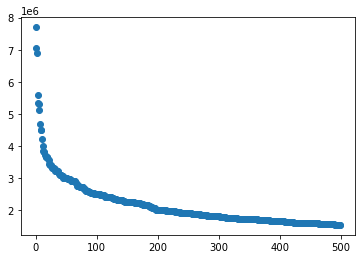

In [51]:
fig, ax = plt.subplots()
ax.scatter(x=range(500), y=data.sort_values('price', ascending=False)['price'][:500])

In [52]:
# homes >= $2 mil are significant outliers, we'll remove them
# Only account for 0.95% of all the data
len(data[data['price'] >= 2000000])/len(data)

0.009711004248564359

In [53]:
len(data)

21419

In [54]:
data = data[data['price'] < 2000000]

In [55]:
len(data)

21211

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


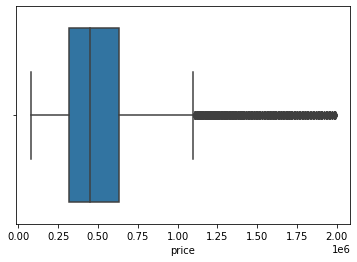

In [56]:
#box plot showing the outliers outliers
sns.boxplot(data['price'], orient='h');

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


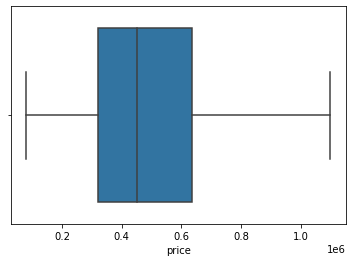

In [57]:
#without the outliers
sns.boxplot(data['price'], orient='h', showfliers=False);

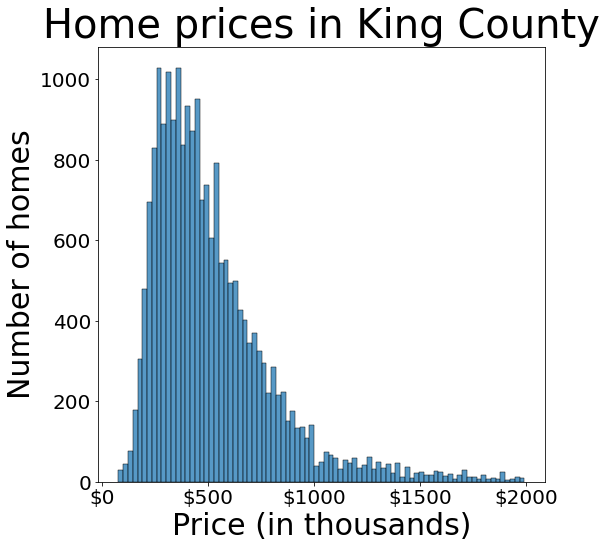

In [58]:
#here we have the new distribution of home prices in the data set
fig, ax = plt.subplots(figsize= (8,8))
ax = sns.histplot(data["price"]/1000)

ax.set_title("Home prices in King County",fontsize=40)
ax.set_xlabel("Price (in thousands)",fontsize=30)
ax.set_ylabel("Number of homes",fontsize=30)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.savefig("House_prices.png")

### Transforming categorical data: 'Grade' to only 4: Low, Average, Above Average, and Excellent

In [62]:
# Lows including 3 Poor, 5 Fair and 6 Low Average
data['grade'].replace('3 Poor','Low', inplace=True)
data['grade'].replace('5 Fair','Low', inplace=True)
data['grade'].replace('4 Low','Low', inplace=True)
data['grade'].replace('6 Low Average','Low', inplace=True)

# Average including 7 Average 
data['grade'].replace('7 Average','Average', inplace=True)

# Average Above including 8 Good,9 Better
data['grade'].replace('8 Good','Above Average', inplace=True)
data['grade'].replace('9 Better','Above Average', inplace=True)

# Excellent including 10 Very Good, 11 Excellent,12 Luxury and 13 Mansion
data['grade'].replace('10 Very Good','Excellent', inplace=True)
data['grade'].replace('11 Excellent','Excellent', inplace=True)
data['grade'].replace('12 Luxury','Excellent', inplace=True)
data['grade'].replace('13 Mansion','Excellent', inplace=True)

In [64]:
#feature breakdown
data['grade'].value_counts(normalize=True)

Average          0.418981
Above Average    0.406487
Low              0.106407
Excellent        0.068125
Name: grade, dtype: float64

### Categorical: 'Condition' to only 3: Low, Average, and Good

In [65]:
#looking at feature breakdown to decide how to transform the data
data['condition'].value_counts(normalize=True)

Average      0.649239
Good         0.263778
Very Good    0.078073
Fair         0.007590
Poor         0.001320
Name: condition, dtype: float64

In [67]:
# Poor including Poor and Fair
data['condition'].replace('Poor','Poor', inplace=True)
data['condition'].replace('Fair','Poor', inplace=True)


#Average staying the same
data['condition'].replace('Average','Average', inplace=True)

# Good including Good and VeryGood
data['condition'].replace('Good','Good', inplace=True)
data['condition'].replace('Very Good','Good', inplace=True)

#data is better distribued when grouped
data['condition'].value_counts(normalize=True)

Average    0.649239
Good       0.341851
Poor       0.008910
Name: condition, dtype: float64

In [68]:
#exploring the means and counts for grades per condition
data.groupby(by=['condition','grade']).agg(['mean','count'])['price']

mean  count
condition grade                             
Average   Above Average  5.760543e+05   6267
          Average        3.848600e+05   5172
          Excellent      1.041862e+06   1218
          Low            2.850692e+05   1114
Good      Above Average  6.922039e+05   2338
          Average        4.274453e+05   3637
          Excellent      1.187174e+06    226
          Low            3.087356e+05   1050
Poor      Above Average  5.165265e+05     17
          Average        3.332941e+05     78
          Excellent      9.500000e+05      1
          Low            2.569839e+05     93

In [70]:
#exploring the means and counts for grades per condition
data.groupby(by=['grade','condition']).agg(['mean','count'])['price']

mean  count
grade         condition                     
Above Average Average    5.760543e+05   6267
              Good       6.922039e+05   2338
              Poor       5.165265e+05     17
Average       Average    3.848600e+05   5172
              Good       4.274453e+05   3637
              Poor       3.332941e+05     78
Excellent     Average    1.041862e+06   1218
              Good       1.187174e+06    226
              Poor       9.500000e+05      1
Low           Average    2.850692e+05   1114
              Good       3.087356e+05   1050
              Poor       2.569839e+05     93

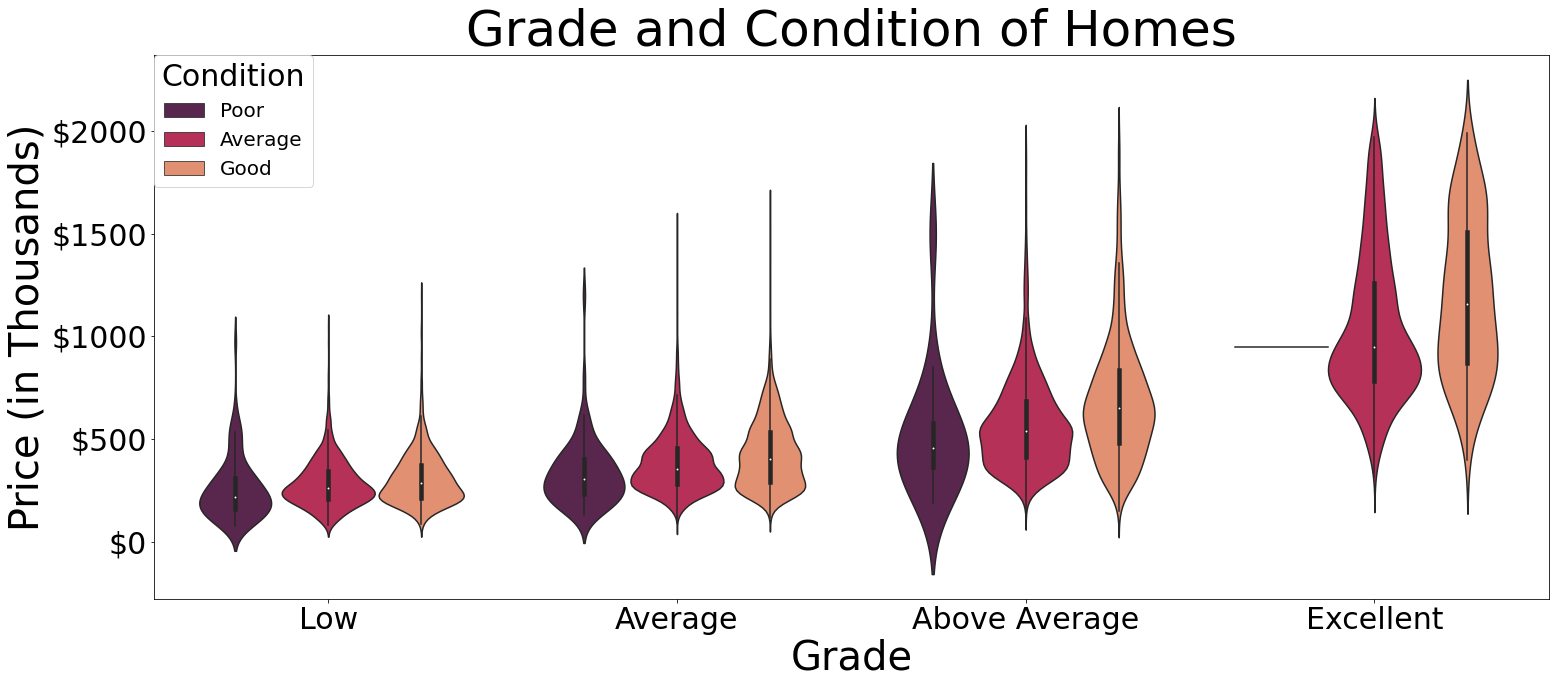

In [71]:
fig,ax = plt.subplots(figsize = (25,10))
sns.violinplot(x='grade',y=(data['price']/1000), hue= "condition", data = data, palette="rocket", 
               order=["Low", "Average", "Above Average", "Excellent"], hue_order = ["Poor", "Average", "Good"])

ax.set_title("Grade and Condition of Homes",fontsize=50)
ax.set_xlabel("Grade",fontsize=40)
ax.set_ylabel("Price (in Thousands)",fontsize=40)
ax.tick_params(labelsize=30)
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.legend(loc="upper left", borderaxespad=0., title = "Condition",fontsize=20, title_fontsize=30)
plt.savefig("Grade_Condition.png")

## Observations of Grad and conditions of Homes
Home price increases as grade improves <br>
Home price increases as condition improves <br>
Home price increases as condition improves within grade

### Onehotencoding the categorical data
He break out our categorical featsures (Condition and Grade) into individaul columns using SkLearn's Onehotencoding function and drop the first column to avoid multicollinearity issues

In [72]:
cond = data[["condition"]]
ohe = OneHotEncoder(categories="auto", handle_unknown="error", sparse=False)
ohe.fit(cond)
cond_encod = ohe.transform(cond)
cond_encod = pd.DataFrame(
    # Pass in NumPy array
    cond_encod,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index= data.index
)
cond_encod.drop(columns='Average', inplace=True)

In [73]:
grade = data[["grade"]]
ohe = OneHotEncoder(categories="auto",handle_unknown="ignore", sparse=False)
ohe.fit(grade)
grade_encod = ohe.transform(grade)
grade_encod = pd.DataFrame(
    # Pass in NumPy array
    grade_encod,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index= data.index
)
grade_encod.drop(columns='Average', inplace=True)

In [74]:
#drops the orginal columns because the data wee need is now split into columns
data = pd.concat([data, cond_encod, grade_encod], axis=1)\
        .drop(columns=['condition','grade'])

### Changing sqft_basement to a binomial variable "has_basement"

In [75]:
# replace sqft_basement with basement: True (1) / False (0)
data['sqft_basement'] = data['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
data.rename(columns={'sqft_basement':'has_basement'}, inplace=True)

#### Feature Engineering:

In [96]:
#bedrooms/sqfoot of living space
data["bedroom/sqft_above_log"] = data["bedrooms"] / data["sqft_above_log"]
#bathrooms/sqfoot of living space 
data["bathrooms/sqft_above_log"] = data["bathrooms"] / data["sqft_above_log"]
#floors/sq foor of living space
data["floors/sqft_above_log"] = data["floors"] / data["sqft_above_log"]
# basement / square foot of living space
data["has_basement*sqft_above_log"] = data['has_basement']\
                                        * data["sqft_above_log"]
# House size to lot size ration
data["sqft_above_log/sqft_lot_log"] = data["sqft_above_log"] / data["sqft_lot_log"]

## Some exploration of cleaned data

In [97]:
#checking the column names for our combined data sets
data.columns

Index(['price', 'price_log', 'sqft_living', 'sqft_living_log', 'sqft_lot',
       'sqft_lot_log', 'sqft_above', 'sqft_above_log', 'has_basement',
       'bedrooms', 'bathrooms', 'floors', 'Good', 'Poor', 'Above Average',
       'Excellent', 'Low', 'bedroom/sqft_above_log',
       'bathrooms/sqft_above_log', 'floors/sqft_above_log',
       'has_basement*sqft_above_log', 'sqft_above_log/sqft_lot_log'],
      dtype='object')

KeyboardInterrupt: 

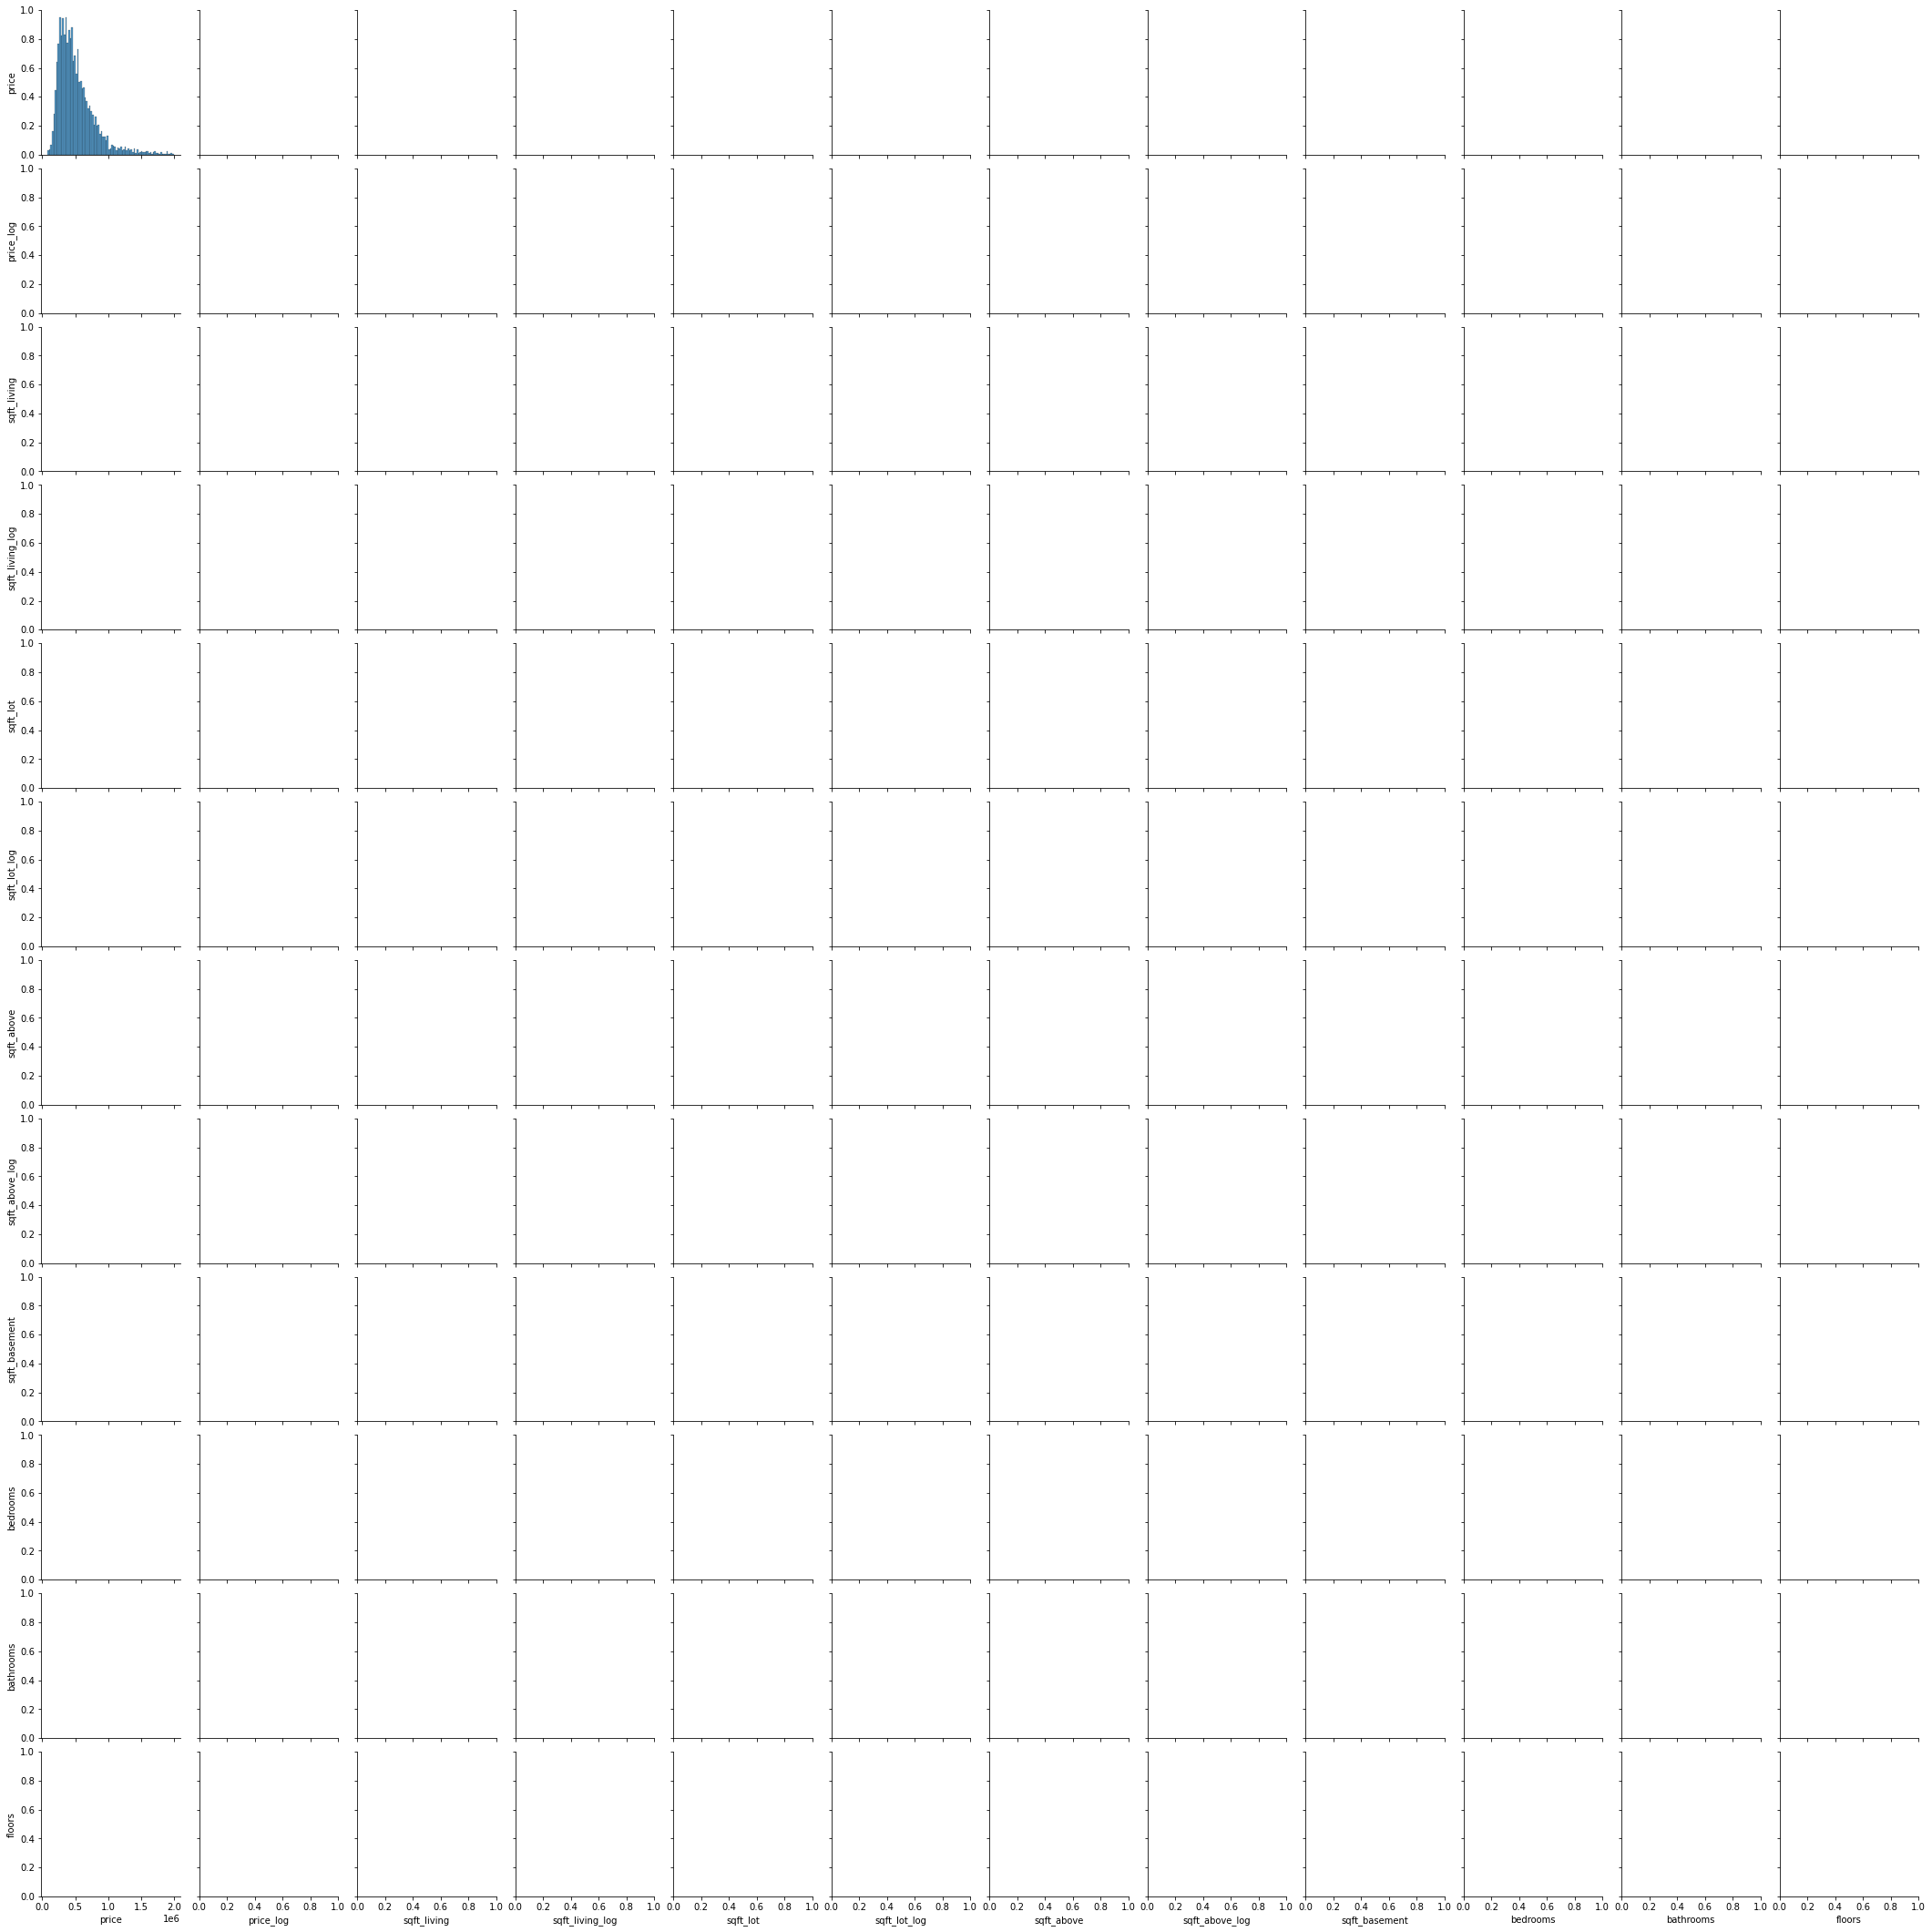

In [60]:
#pair plot visually exploring the relationship between the features
sns.pairplot(data)

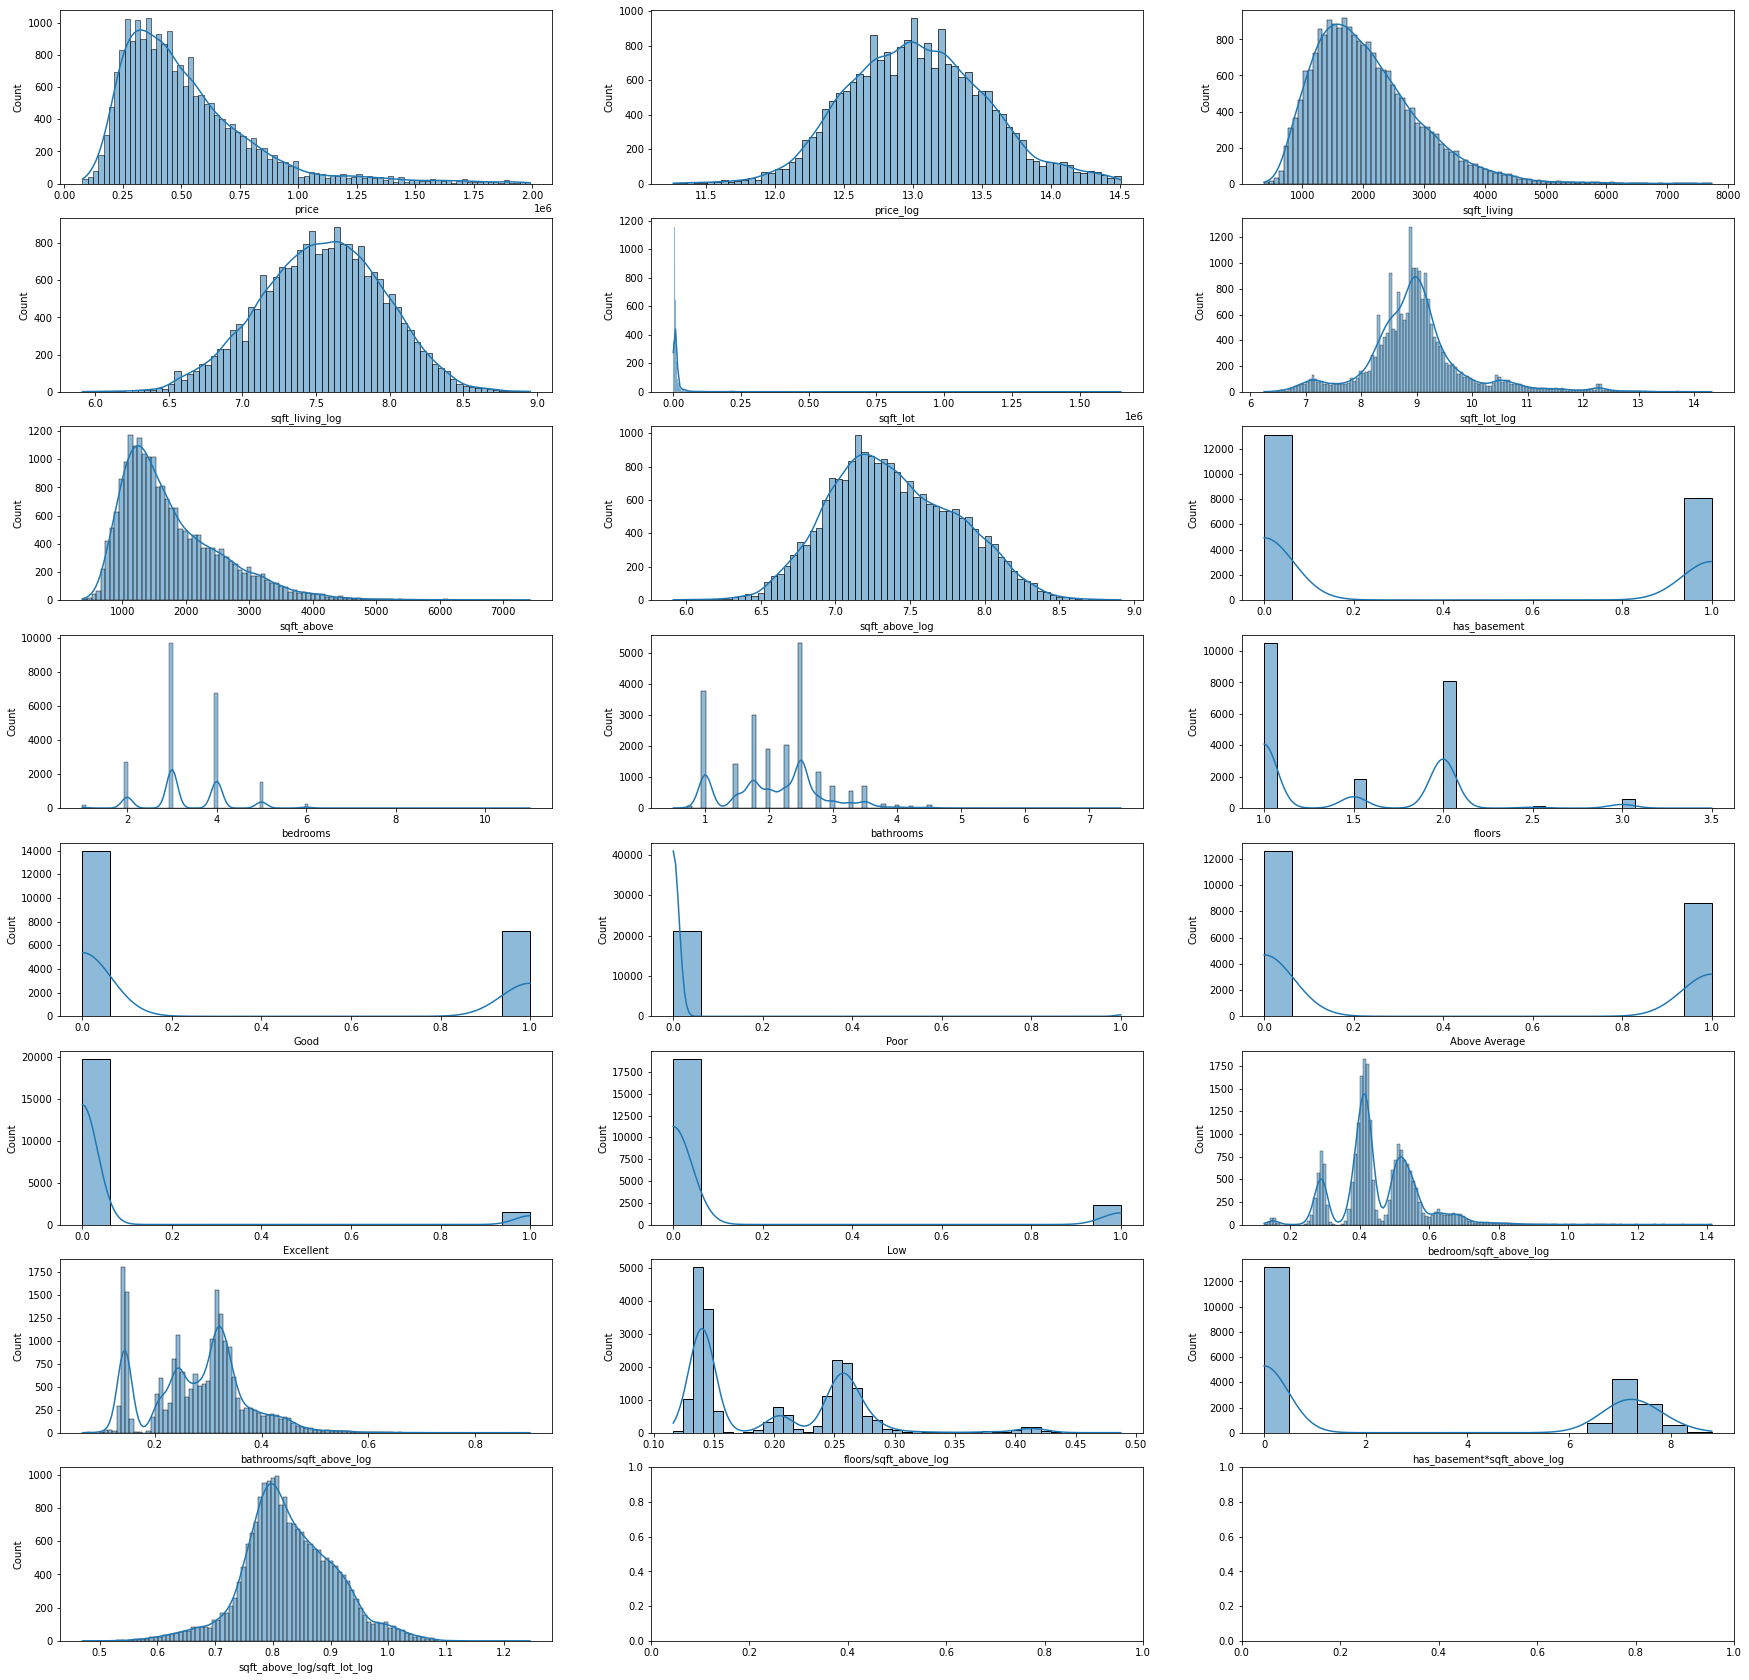

In [100]:
#exploring the distributions of our data
fig, axes = plt.subplots(8,3, figsize=(30,30))
for i, col in enumerate(data.columns):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i//3,i%3]);

In [101]:
#looking at our data set
data

,price,price_log,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,...,Good,Poor,Above Average,Excellent,Low,bedroom/sqft_above_log,bathrooms/sqft_above_log,floors/sqft_above_log,has_basement*sqft_above_log,sqft_above_log/sqft_lot_log
0,221900.0,12.309982,1180,7.073270,5650,8.639411,1180,7.073270,0,3,...,0.0,0.0,0.0,0.0,0.0,0.424132,0.141377,0.141377,0.000000,0.818721
1,538000.0,13.195614,2570,7.851661,7242,8.887653,2170,7.682482,1,3,...,0.0,0.0,0.0,0.0,0.0,0.390499,0.292874,0.260333,7.682482,0.864399
2,180000.0,12.100712,770,6.646391,10000,9.210340,770,6.646391,0,2,...,0.0,0.0,0.0,0.0,1.0,0.300915,0.150458,0.150458,0.000000,0.721623
3,604000.0,13.311329,1960,7.580700,5000,8.517193,1050,6.956545,1,4,...,1.0,0.0,0.0,0.0,0.0,0.574998,0.431249,0.143750,6.956545,0.816765
4,510000.0,13.142166,1680,7.426549,8080,8.997147,1680,7.426549,0,3,...,0.0,0.0,1.0,0.0,0.0,0.403956,0.269304,0.134652,0.000000,0.825434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,360000.0,12.793859,1530,7.333023,1131,7.030857,1530,7.333023,0,3,...,0.0,0.0,1.0,0.0,0.0,0.409108,0.340924,0.409108,0.000000,1.042977
21416,400000.0,12.899220,2310,7.745003,5813,8.667852,2310,7.745003,0,4,...,0.0,0.0,1.0,0.0,0.0,0.516462,0.322789,0.258231,0.000000,0.893532
21417,402101.0,12.904459,1020,6.927558,1350,7.207860,1020,6.927558,0,2,...,0.0,0.0,0.0,0.0,0.0,0.288702,0.108263,0.288702,0.000000,0.961112
21418,400000.0,12.899220,1600,7.377759,2388,7.778211,1600,7.377759,0,3,...,0.0,0.0,1.0,0.0,0.0,0.406628,0.338856,0.271085,0.000000,0.948516


In [102]:
#exploring the correlations between the price and features
data.corr()

,price,price_log,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,...,Good,Poor,Above Average,Excellent,Low,bedroom/sqft_above_log,bathrooms/sqft_above_log,floors/sqft_above_log,has_basement*sqft_above_log,sqft_above_log/sqft_lot_log
price,1.000000,0.941537,0.679370,0.629791,0.097156,0.145628,0.584342,0.552887,0.175257,0.325003,...,0.000315,-0.067465,0.255133,0.515070,-0.270319,0.225370,0.455795,0.202160,0.201653,0.177352
price_log,0.941537,1.000000,0.666314,0.655003,0.097791,0.119942,0.569866,0.563827,0.197646,0.338821,...,-0.006372,-0.098097,0.341057,0.427027,-0.357206,0.241272,0.476657,0.232704,0.220336,0.216572
sqft_living,0.679370,0.666314,1.000000,0.962572,0.174213,0.340383,0.867864,0.845020,0.189572,0.598497,...,-0.097081,-0.073579,0.319024,0.518781,-0.356622,0.460451,0.664615,0.229682,0.223231,0.142391
sqft_living_log,0.629791,0.655003,0.962572,1.000000,0.148557,0.318594,0.827452,0.859608,0.223714,0.635979,...,-0.086061,-0.090634,0.383171,0.421951,-0.447542,0.507170,0.686527,0.239846,0.252432,0.173585
sqft_lot,0.097156,0.097791,0.174213,0.148557,1.000000,0.640746,0.183254,0.161812,-0.036467,0.033468,...,0.005210,0.039408,0.013346,0.114777,-0.008638,0.000538,0.060673,-0.037008,-0.030641,-0.451473
sqft_lot_log,0.145628,0.119942,0.340383,0.318594,0.640746,1.000000,0.324267,0.310798,-0.054065,0.186121,...,0.113461,0.043159,-0.029005,0.207617,-0.004090,0.136390,0.031864,-0.325987,-0.041758,-0.816542
sqft_above,0.584342,0.569866,0.867864,0.827452,0.183254,0.324267,1.000000,0.966671,-0.235504,0.487111,...,-0.194130,-0.063937,0.315555,0.525435,-0.313507,0.306690,0.558008,0.395971,-0.204845,0.234464
sqft_above_log,0.552887,0.563827,0.845020,0.859608,0.161812,0.310798,0.966671,1.000000,-0.231910,0.524653,...,-0.182504,-0.076013,0.387245,0.439025,-0.391505,0.346906,0.580176,0.414294,-0.197849,0.269443
has_basement,0.175257,0.197646,0.189572,0.223714,-0.036467,-0.054065,-0.235504,-0.231910,1.000000,0.154750,...,0.121244,-0.019809,0.024901,-0.011508,-0.122098,0.230417,0.215749,-0.238636,0.998004,-0.079832
bedrooms,0.325003,0.338821,0.598497,0.635979,0.033468,0.186121,0.487111,0.524653,0.154750,1.000000,...,0.003144,-0.059082,0.189321,0.178162,-0.279978,0.978838,0.490105,0.098262,0.173232,0.095979


In [103]:
#exploring the correlations between features to look for multicolinearity issues
datafeat = data.drop(columns=['price','price_log'])
datafeat.corr()

,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Good,Poor,Above Average,Excellent,Low,bedroom/sqft_above_log,bathrooms/sqft_above_log,floors/sqft_above_log,has_basement*sqft_above_log,sqft_above_log/sqft_lot_log
sqft_living,1.000000,0.962572,0.174213,0.340383,0.867864,0.845020,0.189572,0.598497,0.742126,0.352524,-0.097081,-0.073579,0.319024,0.518781,-0.356622,0.460451,0.664615,0.229682,0.223231,0.142391
sqft_living_log,0.962572,1.000000,0.148557,0.318594,0.827452,0.859608,0.223714,0.635979,0.752694,0.361452,-0.086061,-0.090634,0.383171,0.421951,-0.447542,0.507170,0.686527,0.239846,0.252432,0.173585
sqft_lot,0.174213,0.148557,1.000000,0.640746,0.183254,0.161812,-0.036467,0.033468,0.085077,-0.008236,0.005210,0.039408,0.013346,0.114777,-0.008638,0.000538,0.060673,-0.037008,-0.030641,-0.451473
sqft_lot_log,0.340383,0.318594,0.640746,1.000000,0.324267,0.310798,-0.054065,0.186121,0.085292,-0.245445,0.113461,0.043159,-0.029005,0.207617,-0.004090,0.136390,0.031864,-0.325987,-0.041758,-0.816542
sqft_above,0.867864,0.827452,0.183254,0.324267,1.000000,0.966671,-0.235504,0.487111,0.668839,0.527447,-0.194130,-0.063937,0.315555,0.525435,-0.313507,0.306690,0.558008,0.395971,-0.204845,0.234464
sqft_above_log,0.845020,0.859608,0.161812,0.310798,0.966671,1.000000,-0.231910,0.524653,0.684475,0.545480,-0.182504,-0.076013,0.387245,0.439025,-0.391505,0.346906,0.580176,0.414294,-0.197849,0.269443
has_basement,0.189572,0.223714,-0.036467,-0.054065,-0.235504,-0.231910,1.000000,0.154750,0.149617,-0.260286,0.121244,-0.019809,0.024901,-0.011508,-0.122098,0.230417,0.215749,-0.238636,0.998004,-0.079832
bedrooms,0.598497,0.635979,0.033468,0.186121,0.487111,0.524653,0.154750,1.000000,0.521798,0.176726,0.003144,-0.059082,0.189321,0.178162,-0.279978,0.978838,0.490105,0.098262,0.173232,0.095979
bathrooms,0.742126,0.752694,0.085077,0.085292,0.668839,0.684475,0.149617,0.521798,1.000000,0.504878,-0.183144,-0.085909,0.378187,0.364774,-0.405277,0.415596,0.989187,0.427931,0.174991,0.331813
floors,0.352524,0.361452,-0.008236,-0.245445,0.527447,0.545480,-0.260286,0.176726,0.504878,1.000000,-0.313795,-0.058180,0.353925,0.212181,-0.247233,0.064699,0.464976,0.987964,-0.243734,0.627110


In [104]:
#an organized series showing the correlations to price
data.corr().abs().sort_values('price_log',ascending=False)['price_log']

price_log                      1.000000
price                          0.941537
sqft_living                    0.666314
sqft_living_log                0.655003
sqft_above                     0.569866
sqft_above_log                 0.563827
bathrooms                      0.522754
bathrooms/sqft_above_log       0.476657
Excellent                      0.427027
Low                            0.357206
Above Average                  0.341057
bedrooms                       0.338821
floors                         0.306533
bedroom/sqft_above_log         0.241272
floors/sqft_above_log          0.232704
has_basement*sqft_above_log    0.220336
sqft_above_log/sqft_lot_log    0.216572
has_basement                   0.197646
sqft_lot_log                   0.119942
Poor                           0.098097
sqft_lot                       0.097791
Good                           0.006372
Name: price_log, dtype: float64

In [105]:
#preparing the series for a heatmap for visual analysis
topcorr = data.corr().abs().sort_values('price_log',ascending=False)['price_log']
tcv = topcorr.values.reshape(-1,1)
tcf = pd.DataFrame(tcv, index=topcorr.index)

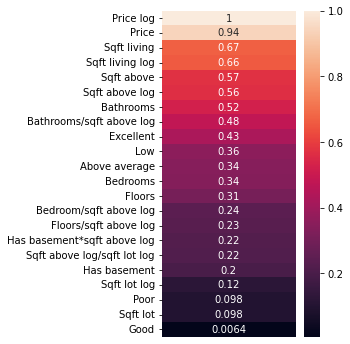

In [106]:
fig, ax = plt.subplots(figsize=(3,6))
sns.heatmap(tcf, annot=True, yticklabels=1, xticklabels=False, ax=ax)
ylabels = [item.capitalize() for item in tcf.index]
ylabels = [item.split('_') for item in ylabels]
ylabels = [' '.join(item) for item in ylabels]
ax.set_yticklabels(ylabels);

In [108]:
# analyzing the high correlated pairs
datafeat = data.drop(columns=['price_log','price'])
dtfc = datafeat.corr().abs().stack().reset_index().sort_values(0, ascending=False)

dtfc['col_pairs'] = list(zip(dtfc.level_0,dtfc.level_1))
dtfc['same'] = dtfc['col_pairs'].map(lambda x: (x[0] in x[1]) or (x[1] in x[0]))
dtfc['col_pairs'] = dtfc['col_pairs'].map(lambda x:sorted(list(x)))
dtfc.set_index(['col_pairs'],inplace=True)
dtfc = dtfc[dtfc['same'] == False]
dtfc.drop(columns=['level_0','level_1','same'],inplace=True)
dtfc.columns = ['C']
dtfc.drop_duplicates(inplace=True)
dtfc.head(20)

,C
col_pairs,
"[bedroom/sqft_above_log, bedrooms]",0.978838
"[sqft_above, sqft_living]",0.867864
"[sqft_above_log, sqft_living_log]",0.859608
"[sqft_above_log, sqft_living]",0.845020
"[sqft_above, sqft_living_log]",0.827452
"[bathrooms, sqft_living_log]",0.752694
"[bathrooms, sqft_living]",0.742126
"[bathrooms/sqft_above_log, sqft_living_log]",0.686527
"[bathrooms, sqft_above_log]",0.684475


# lets discuss what and where we want to include these in presentation

## Exploring direct linear regressions on price
We will not explore logged data for clarity and understanding

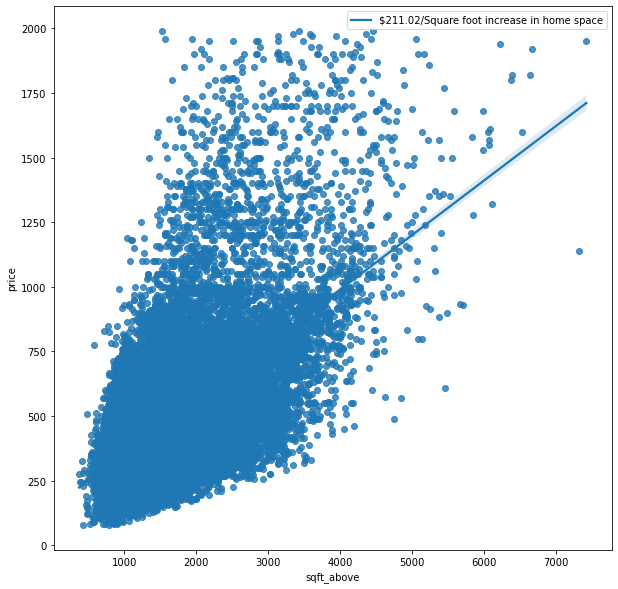

In [95]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["sqft_above"],data['price'])

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.regplot(x=(data["sqft_above"]), y=(data['price']/1000),
                 line_kws={'label':"${0:.2f}/Square foot increase in home space".format(slope)})
ax.legend()

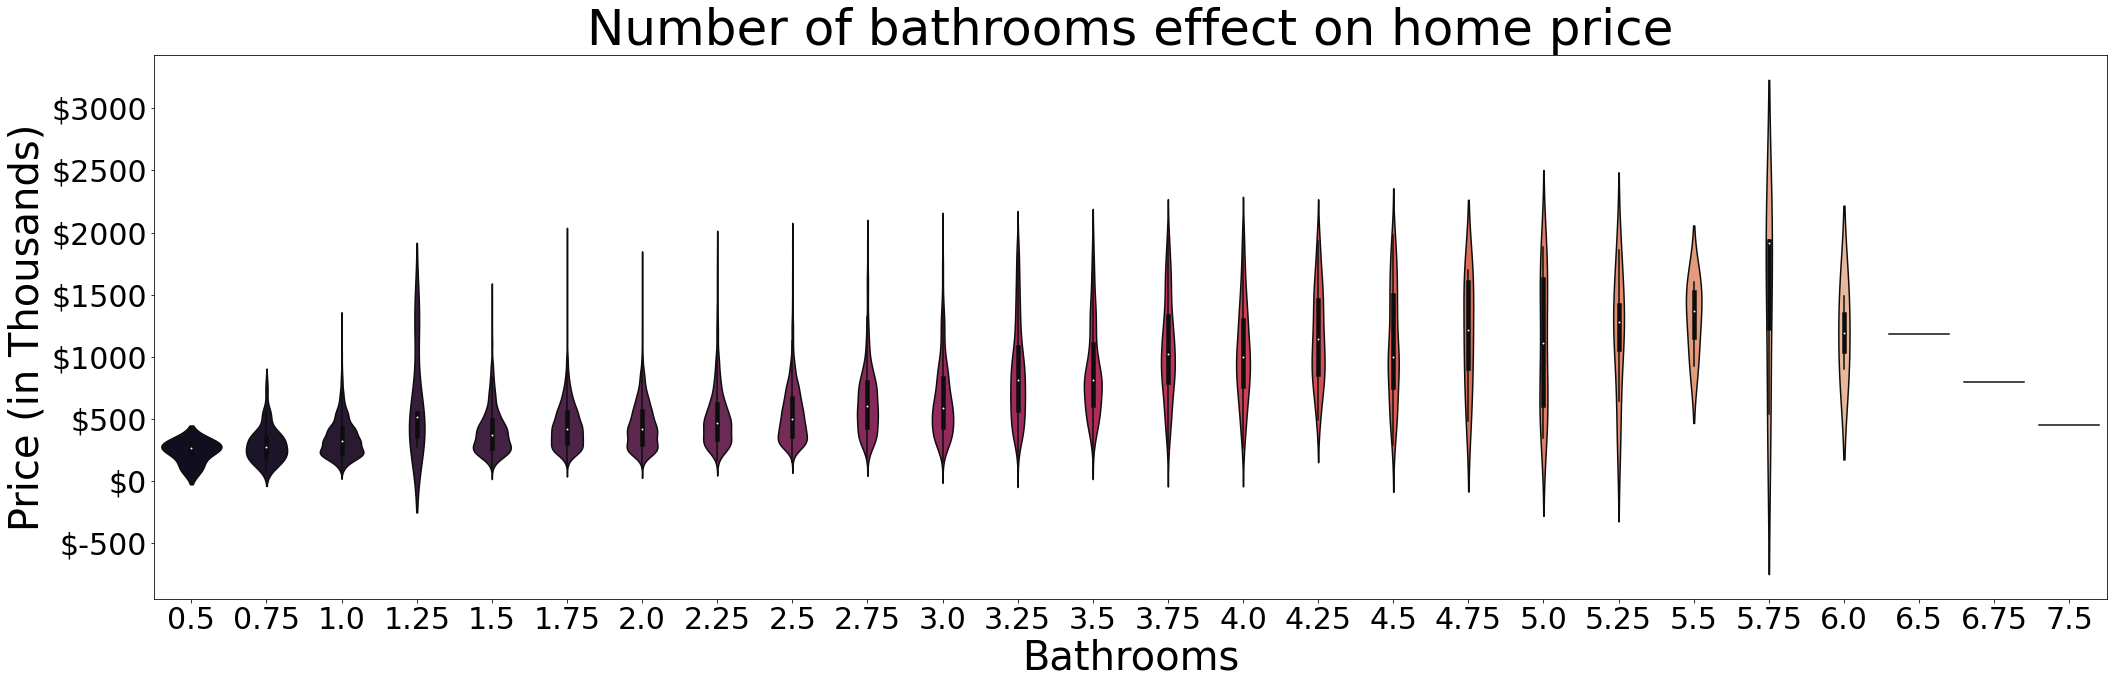

In [91]:
fig,ax = plt.subplots(figsize = (35,10))
sns.violinplot(x='bathrooms',y=(data['price']/1000), data = data, palette="rocket")

ax.set_title("Number of bathrooms effect on home price",fontsize=50)
ax.set_xlabel("Bathrooms",fontsize=40)
ax.set_ylabel("Price (in Thousands)",fontsize=40)
ax.tick_params(labelsize=30)
ax.yaxis.set_major_formatter('${x:1.0f}')
plt.savefig("bathrooms.png")

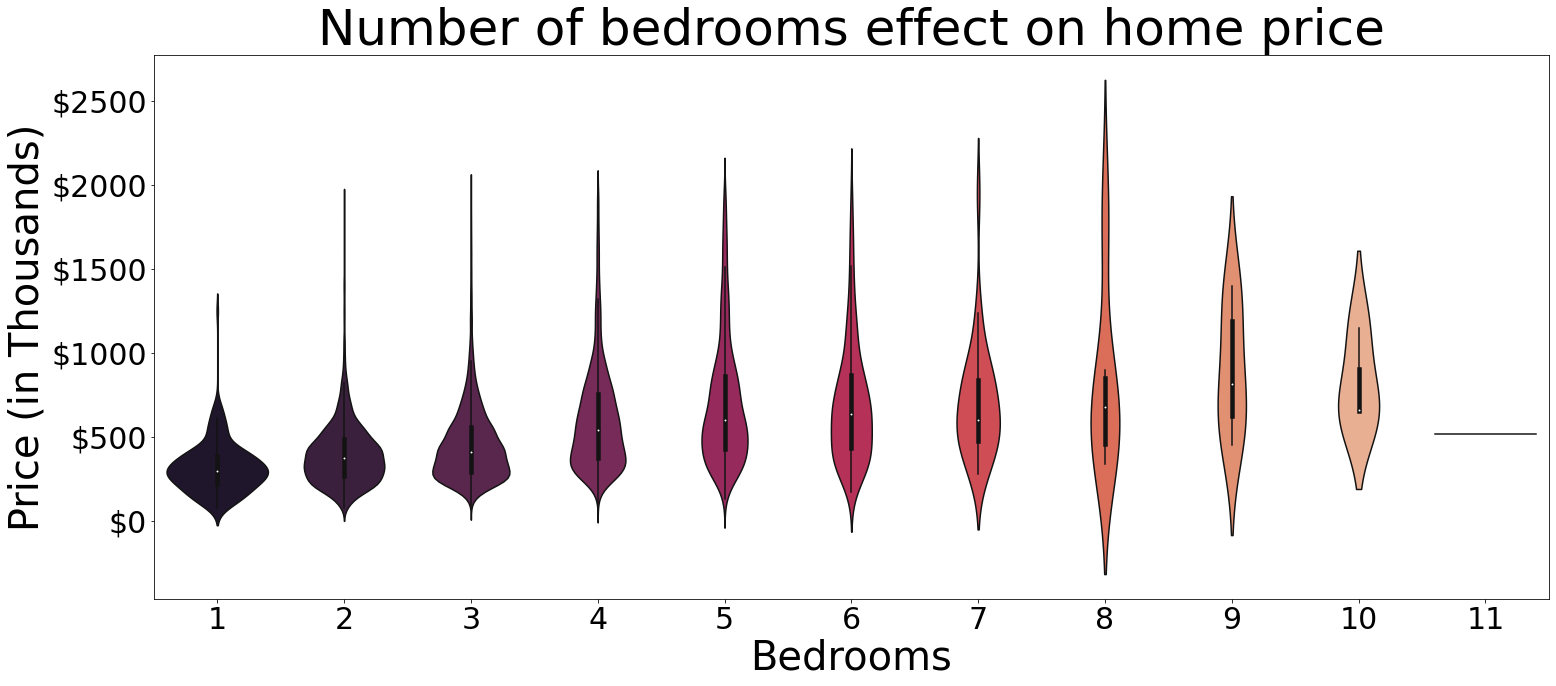

In [92]:
fig,ax = plt.subplots(figsize = (25,10))
sns.violinplot(x='bedrooms',y=(data['price']/1000), data = data, palette="rocket")

ax.set_title("Number of bedrooms effect on home price",fontsize=50)
ax.set_xlabel("Bedrooms",fontsize=40)
ax.set_ylabel("Price (in Thousands)",fontsize=40)
ax.tick_params(labelsize=30)
ax.yaxis.set_major_formatter('${x:1.0f}')
plt.savefig("bedrooms.png")

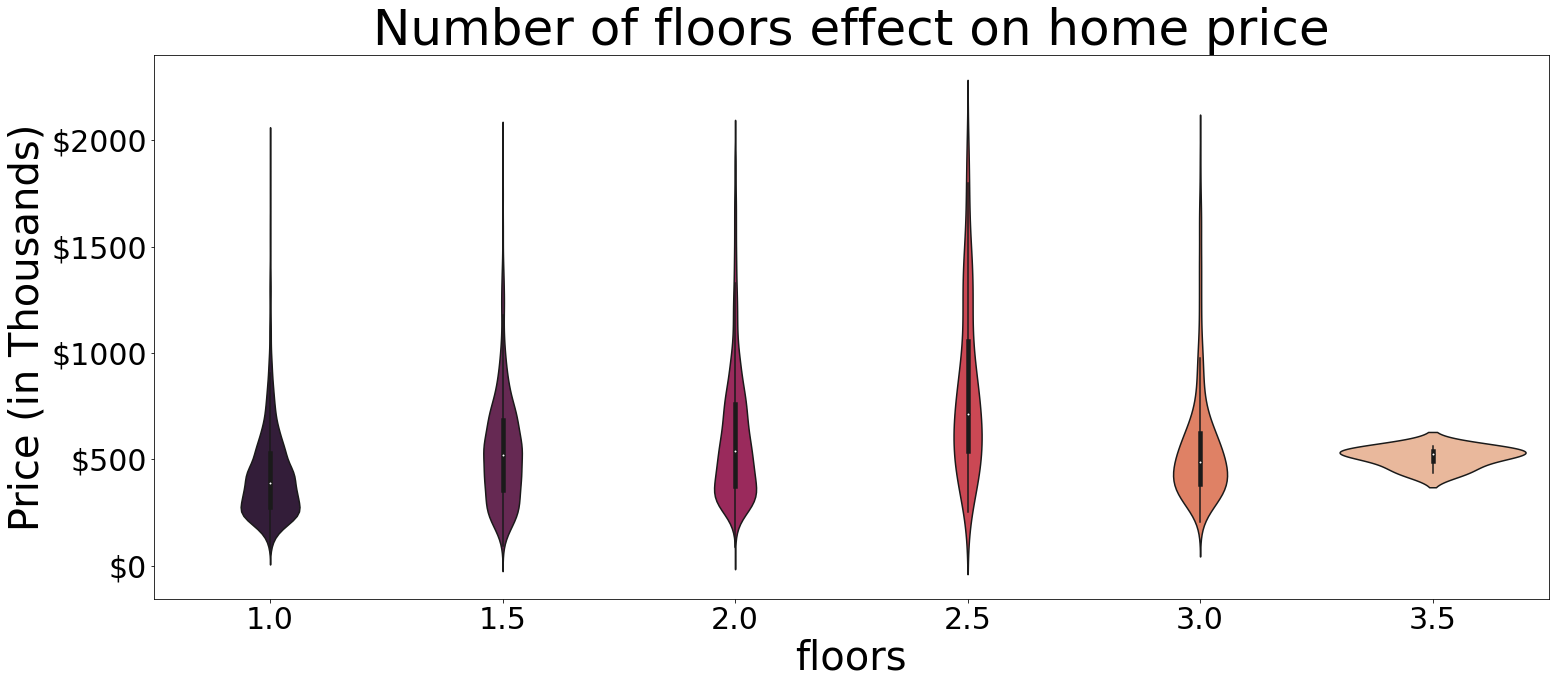

In [93]:
fig,ax = plt.subplots(figsize = (25,10))
sns.violinplot(x='floors',y=(data['price']/1000), data = data, palette="rocket")

ax.set_title("Number of floors effect on home price",fontsize=50)
ax.set_xlabel("floors",fontsize=40)
ax.set_ylabel("Price (in Thousands)",fontsize=40)
ax.tick_params(labelsize=30)
ax.yaxis.set_major_formatter('${x:1.0f}')
plt.savefig("floors.png")

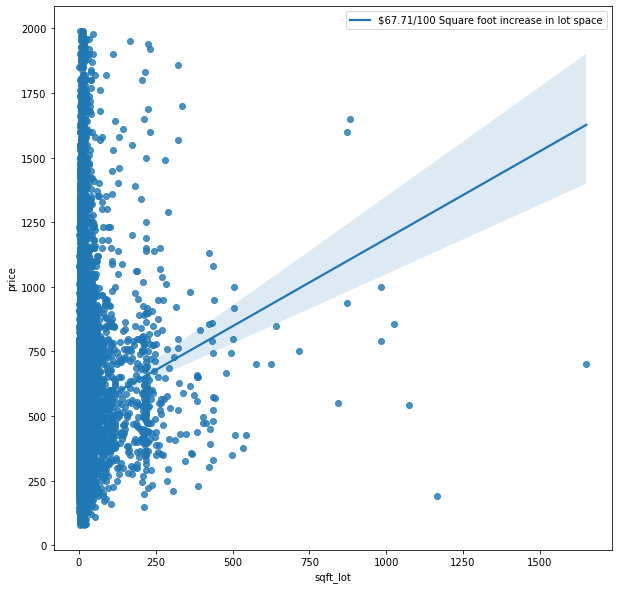

In [94]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["sqft_lot"],data['price'])

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.regplot(x=(data["sqft_lot"]/1000), y=(data['price']/1000),
                 line_kws={'label':"${0:.2f}/100 Square foot increase in lot space".format(slope*100)},)
ax.legend()

## Let's build models.

## Test, Train, Split the data
Here we split the data into a test and train set. We will fit and transform the training data and later fit the training data to analyze. We will be using he log transformed data to utilize the more normative distribution of the data. We will additionally be scaling our data to allow the model to weigh the features equally bcasue they will be on the same scale and we will be able to compare the feature coefficients bewteen one another.

In [109]:
#X will b all of the features of the data set to analyze. "price_log" will be the target variable.
X = data.drop(columns=['price_log','price'])

X_train, X_test, y_train, y_test = \
train_test_split(X, data['price_log'], test_size=0.33, random_state=42)

In [114]:
#looking at the descriptive statistics of our x training data.
X_train.describe()

,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Good,Poor,Above Average,Excellent,Low,bedroom/sqft_above_log,bathrooms/sqft_above_log,floors/sqft_above_log,has_basement*sqft_above_log,sqft_above_log/sqft_lot_log
count,14211.000000,14211.000000,1.421100e+04,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000
mean,2052.220533,7.541830,1.539518e+04,8.986775,1768.280205,7.387211,0.382169,3.358736,2.101787,1.495356,0.339666,0.008726,0.407431,0.068679,0.104919,0.452471,0.281530,0.200836,2.776074,0.828724
std,862.779689,0.415416,4.226203e+04,0.917233,795.027986,0.420404,0.485935,0.900901,0.746645,0.542247,0.473613,0.093006,0.491374,0.252917,0.306459,0.111481,0.090692,0.068196,3.536894,0.080219
min,380.000000,5.940171,5.200000e+02,6.253829,380.000000,5.940171,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.124901,0.064594,0.116358,0.000000,0.470020
25%,1420.000000,7.258412,5.001500e+03,8.517493,1190.000000,7.081709,0.000000,3.000000,1.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.399068,0.223570,0.140235,0.000000,0.778814
50%,1900.000000,7.549609,7.585000e+03,8.933928,1560.000000,7.352441,0.000000,3.000000,2.250000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426210,0.294498,0.191914,0.000000,0.820885
75%,2530.000000,7.835975,1.057950e+04,9.266673,2190.000000,7.691657,1.000000,4.000000,2.500000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.522250,0.334222,0.256689,7.090077,0.879557
max,7730.000000,8.952864,1.164794e+06,13.968055,7420.000000,8.911934,1.000000,11.000000,7.500000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.413296,0.902910,0.487616,8.803875,1.245880


In [115]:
#looking at the descriptive statistics of our x test data.
X_test.describe()

,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Good,Poor,Above Average,Excellent,Low,bedroom/sqft_above_log,bathrooms/sqft_above_log,floors/sqft_above_log,has_basement*sqft_above_log,sqft_above_log/sqft_lot_log
count,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,2059.059429,7.545577,1.423799e+04,8.974568,1772.214714,7.390465,0.381429,3.372286,2.101321,1.486143,0.346286,0.009286,0.404571,0.06700,0.109429,0.454139,0.281344,0.199484,2.771189,0.829600
std,862.209585,0.414653,3.856357e+04,0.872002,788.200296,0.418727,0.485772,0.889351,0.744144,0.533444,0.475820,0.095921,0.490844,0.25004,0.312198,0.109746,0.090358,0.066712,3.536325,0.077788
min,370.000000,5.913503,6.090000e+02,6.411818,370.000000,5.913503,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.132093,0.078368,0.119626,0.000000,0.500808
25%,1430.000000,7.265430,5.048000e+03,8.526747,1200.000000,7.090077,0.000000,3.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.398780,0.222770,0.140078,0.000000,0.781230
50%,1920.000000,7.560080,7.560000e+03,8.930626,1560.000000,7.352441,0.000000,3.000000,2.250000,1.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.426210,0.293227,0.183844,0.000000,0.821155
75%,2520.000000,7.832014,1.049775e+04,9.258916,2190.000000,7.691657,1.000000,4.000000,2.500000,2.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.524549,0.333532,0.256418,7.098376,0.881036
max,7480.000000,8.919988,1.651359e+06,14.317109,6640.000000,8.800867,1.000000,9.000000,6.750000,3.500000,1.000000,1.000000,1.000000,1.00000,1.000000,1.193788,0.791040,0.481272,8.547334,1.178271


In [116]:
#looking at the descriptive statistics of our y training data.
y_train

21018    13.122363
926      13.997832
8279     13.142166
16991    12.542545
7517     12.608199
           ...    
11386    12.388394
12072    13.329378
5447     13.508985
872      12.206073
15942    13.304685
Name: price_log, Length: 14211, dtype: float64

In [117]:
#looking at the descriptive statistics of our y test data.
y_test

16806    12.570716
14026    12.815838
16418    14.408837
7384     12.745486
13754    12.873902
           ...    
1503     13.480038
8659     12.201708
14909    13.120361
14688    12.889169
3325     12.833347
Name: price_log, Length: 7000, dtype: float64

In [118]:
#Here we use SkLearn's Standard Scaler to scale all of our data to the same scale.

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [119]:
#taking a look at the scaled X trained data
X_train_scaled

,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Good,Poor,Above Average,Excellent,Low,bedroom/sqft_above_log,bathrooms/sqft_above_log,floors/sqft_above_log,has_basement*sqft_above_log,sqft_above_log/sqft_lot_log
21018,-0.860297,-0.876375,-0.328798,-1.824634,-0.765132,-0.787450,1.271474,-1.508250,0.533355,0.930686,-0.717207,-0.093821,1.205987,-0.271558,-0.34237,-1.516287,0.802407,1.211303,1.210173,1.697005
926,1.863553,1.596984,0.165990,1.123514,0.077635,0.297012,1.271474,-0.398211,-0.136331,-0.913556,1.394297,-0.093821,1.205987,-0.271558,-0.34237,-0.476457,-0.168617,-0.993007,1.339074,-0.982483
8279,-0.083710,0.118013,-0.127949,0.242439,-0.538717,-0.444317,1.271474,0.711828,1.537884,-0.913556,-0.717207,-0.093821,1.205987,-0.271558,-0.34237,0.924415,1.872684,-0.908518,1.250958,-0.583992
16991,-0.860297,-0.876375,-0.208118,-0.209278,-0.576453,-0.498177,-0.786489,-1.508250,-1.475704,-0.913556,-0.717207,-0.093821,-0.829196,-0.271558,2.92082,-1.559364,-1.568114,-0.902094,-0.784918,-0.156912
7517,-0.048937,0.154214,-0.173452,0.009283,-0.853183,-0.935509,1.271474,-0.398211,-0.471174,-0.913556,1.394297,-0.093821,-0.829196,-0.271558,-0.34237,-0.211058,-0.345278,-0.848390,1.192574,-0.638439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11386,-0.037346,0.166161,-0.119809,0.279357,-0.953812,-1.116834,1.271474,0.711828,-0.471174,-0.913556,-0.717207,-0.093821,-0.829196,-0.271558,-0.34237,1.128077,-0.314876,-0.825287,1.171021,-1.001011
12072,0.194471,0.393434,-0.193352,-0.110784,0.341786,0.555424,1.271474,-0.398211,-0.471174,-0.913556,-0.717207,-0.093821,1.205987,-0.271558,-0.34237,-0.527524,-0.572199,-1.020834,1.369790,0.361081
5447,0.484242,0.650321,-0.089733,0.405848,-0.287145,-0.113402,1.271474,-0.398211,0.198512,0.930686,-0.717207,-0.093821,1.205987,-0.271558,-0.34237,-0.392244,0.275985,1.050835,1.290292,-0.554788
872,-0.153255,0.043936,-0.250190,-0.551494,-1.067019,-1.338847,1.271474,0.711828,-0.136331,-0.913556,-0.717207,10.658557,-0.829196,-0.271558,2.92082,1.199015,0.127218,-0.796296,1.144632,-0.299845


## Baseline Understanding

In [139]:

train_target_mean = y_train.mean()
baseline_train_pred = [train_target_mean] * len(y_train)
baseline_test_pred = [train_target_mean] * len(y_test)

In [140]:
def evaluate(y_tr, y_te, y_tr_pr, y_te_pr, log=True):
    '''
    Evaluates the error between the model predictions and the real values for both
    training and test sets.
    
    Arguments:
    y_tr - array-like
        Actual values for output variable, for the training set
    y_tr_pr - array-like
        Predicted values for output variable, for the training set
    y_te - array-like
        Actual values for output variable, for the test set
    y_te_pr - array-like
        Predicted values for output variable, for the test set
    log=True
        If true, 
    Returns:
    R2 scores for Train and Test sets
    RMSE for Train and Test sets
    MAE for Train and Test sets
    '''
    if log == True:
        y_tr = np.exp(y_tr)
        y_te = np.exp(y_te)
        y_tr_pr = np.exp(y_tr_pr)
        y_te_pr = np.exp(y_te_pr)
        
    # residuals
    train_res = y_tr - y_tr_pr
    test_res = y_te - y_te_pr
    
    print(f'Train R2 score: {r2_score(y_tr, y_tr_pr)} ')
    print(f'Test R2 score: {r2_score(y_te, y_te_pr)} ')
    print('<><><><><>')
    print(f'Train RMSE: ${mean_squared_error(y_tr, y_tr_pr, squared=False):,.2f} ')
    print(f'Test RMSE: ${mean_squared_error(y_te, y_te_pr, squared=False):,.2f} ')
    print('<><><><><>')
    print(f'Train MAE: ${mean_absolute_error(y_tr, y_tr_pr):,.2f} ')
    print(f'Test MAE: ${mean_absolute_error(y_te, y_te_pr):,.2f} ')
    

    
    # scatter plot of residuals
    print("\nScatter of residuals:")
    plt.scatter(y_tr_pr, train_res, label='Train')
    plt.scatter(y_te_pr, test_res, label='Test')
    plt.axhline(y=0, color='purple', label='0')
    plt.xlabel("Predicted Price")
    plt.ylabel("Residual Price")
    plt.legend()
    plt.show()
    
    print("QQ Plot of residuals:")
    fig, ax = plt.subplots()
    sm.qqplot(train_res, ax=ax, marker='.', color='r', label='Train', alpha=0.3, line='s')
    sm.qqplot(test_res, ax=ax,  marker='.', color='g', label='Test', alpha=0.3)
    plt.legend()

Train R2 score: -0.04734690884315751 
Test R2 score: -0.04663177092804793 
<><><><><>
Train RMSE: $291,204.17 
Test RMSE: $296,428.58 
<><><><><>
Train MAE: $201,000.40 
Test MAE: $204,008.46 

Scatter of residuals:


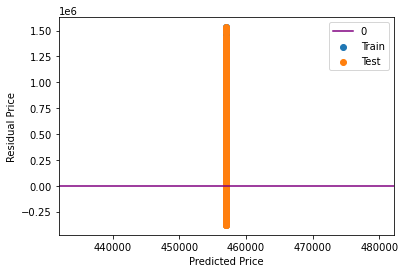

QQ Plot of residuals:


C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly 

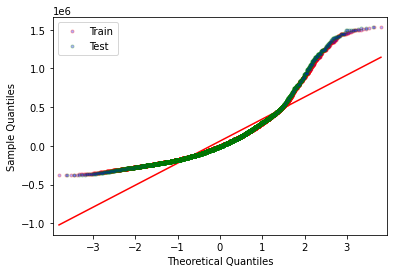

In [141]:
evaluate(y_train, y_test, baseline_train_pred, baseline_test_pred)

This very simple model will predict the average of the training data set prices and will not utilize any independent variable. This will result in the residuals being the same. As you can see the training and test residuals are almost directly over laid on one another. Which is predicatble based on the paramaters of our current model. This is not a practical model for the scope of our project.

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### First model

This very simple, substandard model is a simple linear regression model between the space in a home and the price of the home. This was the stongest and most normative distribution to price. 

In [120]:
def smols(X,y,cols=None):
    Xcol = X[cols]
    shmod = sm.OLS(endog=y, exog=sm.add_constant(Xcol)).fit()
    return shmod

In [121]:
cols = ['sqft_living_log']
smols(X_train,y_train,cols).summary()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.082e+04
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:25:43   Log-Likelihood:                -6223.6
No. Observations:               14211   AIC:                         1.245e+04
Df Residuals:                   14209   BIC:                         1.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.0932      0.057    124.023      0.000       6.981       7.205
sqft_living_log     0.7875      0.008    104.004      0.000       0.773       0.802
==============================================================================
Omnibus:                      118.957   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.117
Skew:                           0.020   Prob(JB):                     6.61e-18
Kurtosis:                       2.637   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model is better than the baseline model, because it is taking one independent variable into the model compared to none in our base line model. The model is accounting for 43.2% variance in the model. The p-value is less than or alpha of 0.05 which implies significance. After scaling the data back the coefficient for the log square foot of the living space states acoounts for X amount of dollars of change for every 1 square foot increase in the home. 

# do we need this function here? or can we move it down? scrap it?

In [122]:
def linpreds(X_tr_scaled, y_tr, X_te_scaled):
    '''
    Uses Linear Regression to generate output predictions given training and test inputs.
    Arguments:
    X_tr_scaled - dataframe
        Input variables and values for the training set
    y_tr - array-like
        Actual values for output variable, for the training set
    X_te_scaled - dataframe
        Input variables and values for the test set
    Returns:
    Output (y) prediction arrays:
        train, test
    '''
    lr = LinearRegression()
    lr.fit(X_tr_scaled, y_tr)
    return lr.predict(X_tr_scaled), lr.predict(X_te_scaled)

In [123]:
X_train_scaled.columns

Index(['sqft_living', 'sqft_living_log', 'sqft_lot', 'sqft_lot_log',
       'sqft_above', 'sqft_above_log', 'has_basement', 'bedrooms', 'bathrooms',
       'floors', 'Good', 'Poor', 'Above Average', 'Excellent', 'Low',
       'bedroom/sqft_above_log', 'bathrooms/sqft_above_log',
       'floors/sqft_above_log', 'has_basement*sqft_above_log',
       'sqft_above_log/sqft_lot_log'],
      dtype='object')

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [124]:
smols(X_train_scaled,y_train,\
      cols=['sqft_living_log']).summary()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.082e+04
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:38:37   Log-Likelihood:                -6223.6
No. Observations:               14211   AIC:                         1.245e+04
Df Residuals:                   14209   BIC:                         1.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.0325      0.003   4143.352      0.000      13.026      13.039
sqft_living_log     0.3271      0.003    104.004      0.000       0.321       0.333
==============================================================================
Omnibus:                      118.957   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.117
Skew:                           0.020   Prob(JB):                     6.61e-18
Kurtosis:                       2.637   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# what am i missing here? is this not the same as the previous model?

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [125]:
smols(X_train_scaled,y_train,\
      cols=['sqft_living_log','Above Average', 'Excellent', 'Low']).summary()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     3607.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:42:05   Log-Likelihood:                -5265.2
No. Observations:               14211   AIC:                         1.054e+04
Df Residuals:                   14206   BIC:                         1.058e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.0325      0.003   4431.944      0.000      13.027      13.038
sqft_living_log     0.2007      0.004     48.627      0.000       0.193       0.209
Above Average       0.1161      0.004     32.270      0.000       0.109       0.123
Excellent           0.1497      0.004     40.799      0.000       0.143       0.157
Low                -0.0417      0.003    -12.532      0.000      -0.048      -0.035
==============================================================================
Omnibus:                       44.485   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.171
Skew:                           0.071   Prob(JB):                     5.14e-09
Kurtosis:                       2.790   Cond. No.                         2.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model analyzes how home size and grade interact to predict the home price. The r squred value has risen by 7.2 % to 50.4% prediction in variance. Each of the pvalues is lower than alpha implying significance. The coefficents are not to high, but our condition number is below, meaning there are no issues of multicolinearity.

## Stepwise function

This stepwise function is designed to take an empty model, and each time, the variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). After adding each new variable in the model, the algorithm will look at the RMSE of all the other parameter estimates which were added to the model previously, and remove them if the RMSE exceeds a certain value (backward step). The algorithm stops when no variables can be added or removed given the threshold values.

In [127]:
def stepwise_selection(X_tr, y_tr, X_te=None, y_te=None,
                       initial_list=[], no_use=[], 
                       verbose=True):
    """
    Perform a forward-backward feature selection 
    based on R2 from sklearn
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        X_tr - pandas.DataFrame with training candidate features
        y_tr - list-like with the training target
        X_te - pandas.DataFrame with test candidate features
        y_te - list-like with the test target
        initial_list - list of features to start with (column names of X_tr)
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(set(initial_list))
    while True:
        changed=False
        # forward step with R2
        # add feature if the resulting test R2 >= previous test R2
        on_hold = []
        excluded = list(set(X_tr.columns)-set(no_use)-set(included)-set(on_hold))
        new_r2 = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            trpred, tepred = linpreds(X_tr[included+[new_column]], y_tr, 
                                      X_te[included+[new_column]])
            new_r2[new_column] = r2_score(y_te, tepred)
        best_r2 = new_r2.max()
        if best_r2 > r2_score(y_te, tepred):
            best_feature = new_r2.idxmax()
            included.append(best_feature)
            try:
                on_hold.pop()
            except:
                pass
            changed=True
            if verbose:
                print('Add  {:30} with r2: {:.6}'.format(best_feature, best_r2))

        # backward step with RMSE
        trpred, tepred = linpreds(X_tr[included], y_tr, X_te[included])
        y_te_unl, tepred_unl = np.exp(y_te), np.exp(tepred)
        rmse_pre = mean_squared_error(y_te_unl, tepred_unl, squared=False)
        print('Before removal RMSE: {:.2f}'.format(rmse_pre))
        rmses = pd.Series(index=included, dtype='float64')
        for column in included:
            trpred, tepred = linpreds(X_tr[list(set(included)-set(column))], y_tr, 
                                      X_te[list(set(included)-set(column))])
            y_te_unl, tepred_unl = np.exp(y_te), np.exp(tepred)
            rmses[column] = mean_squared_error(y_te_unl, tepred_unl, squared=False)
        lowest_rmse = rmses.min()
        if lowest_rmse < rmse_pre:
            changed=True
            bad_feature = rmses.idxmin()
            on_hold.append(bad_feature)
            included.remove(bad_feature)
            if verbose:
                print('Drop {:30} with RMSE {:.2f}'.format(bad_feature, lowest_rmse))
        else:
            if verbose:
                print('Keep {:30} with RMSE {:.2f}'.format(best_feature, lowest_rmse))
        if not changed:
            break
    return included

In [128]:
stepwise_selection(X_train_scaled, y_train, X_test_scaled, y_test,  \
                   initial_list=['sqft_living_log','Low','Excellent','Above Average'], 
                   no_use=['sqft_living_log/sqft_lot_log','sqft_living','sqft_lot',
                           'sqft_above','has_basement*sqft_living_log'])

Add  Good                           with r2: 0.504756
Before removal RMSE: 202681.79
Drop Low                            with RMSE 202681.79
Add  sqft_lot_log                   with r2: 0.5095
Before removal RMSE: 199837.82
Drop sqft_living_log                with RMSE 199837.82
Add  sqft_living_log                with r2: 0.5095
Before removal RMSE: 199837.82
Keep sqft_living_log                with RMSE 199837.82
Add  has_basement*sqft_above_log    with r2: 0.515259
Before removal RMSE: 198595.90
Keep has_basement*sqft_above_log    with RMSE 198595.90
Add  bedroom/sqft_above_log         with r2: 0.519907
Before removal RMSE: 197784.86
Keep bedroom/sqft_above_log         with RMSE 197784.86
Add  Low                            with r2: 0.523833
Before removal RMSE: 198229.42
Keep Low                            with RMSE 198229.42
Add  bedrooms                       with r2: 0.527979
Before removal RMSE: 197068.31
Drop Excellent                      with RMSE 197068.31
Add  Excellent   

['Above Average',
 'Good',
 'sqft_above_log/sqft_lot_log',
 'sqft_living_log',
 'sqft_above_log',
 'bathrooms/sqft_above_log',
 'has_basement*sqft_above_log',
 'bathrooms',
 'sqft_lot_log',
 'Low',
 'bedroom/sqft_above_log',
 'Excellent',
 'bedrooms']

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

# I'm confused about what is going on passed this point. I dont want to mess anything up, which model is the final model?

In [911]:
# code here to show your final model

In [912]:
# code here to evaluate your final model

In [135]:
relcol =['Good',
'sqft_lot_log',
'Above Average',
'Excellent',
'Low',
'bedrooms',
'sqft_above_log']
smols(X_train_scaled, y_train, cols=relcol).summary()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     1777.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:58:59   Log-Likelihood:                -5775.3
No. Observations:               14211   AIC:                         1.157e+04
Df Residuals:                   14203   BIC:                         1.163e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0325      0.003   4275.237      0.000      13.027      13.039
Good               0.0631      0.003     19.831      0.000       0.057       0.069
sqft_lot_log      -0.0214      0.003     -6.408      0.000      -0.028      -0.015
Above Average      0.1546      0.004     40.172      0.000       0.147       0.162
Excellent          0.1982      0.004     50.886      0.000       0.191       0.206
Low               -0.0707      0.003    -20.837      0.000      -0.077      -0.064
bedrooms           0.0329      0.004      9.042      0.000       0.026       0.040
sqft_above_log     0.1086      0.005     22.013      0.000       0.099       0.118
==============================================================================
Omnibus:                       12.613   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.635
Skew:                           0.036   Prob(JB):                      0.00298
Kurtosis:                       2.879   Cond. No.                         3.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train R2 score: 0.46549763319959947 
Test R2 score: 0.46097928603192373 
<><><><><>
Train RMSE: $208,030.56 
Test RMSE: $212,728.58 
<><><><><>
Train MAE: $146,846.97 
Test MAE: $149,969.50 

Scatter of residuals:


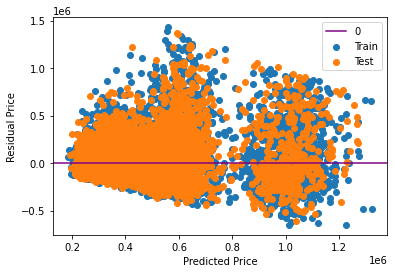

QQ Plot of residuals:


C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly 

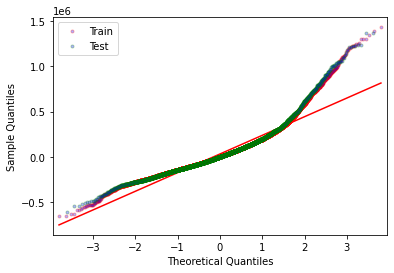

In [142]:
Xftr, Xfte = X_train_scaled[relcol], X_test_scaled[relcol]
trp, tep = linpreds(Xftr, y_train, Xfte)
evaluate(y_train, y_test, trp, tep)

In [144]:
relcol = ['has_basement',
 'Good',
 'sqft_lot_log',
 'bedrooms',
 'Above Average',
 'Excellent',
 'Low',
 'sqft_above_log']
smols(X_train_scaled, y_train, cols=relcol).summary()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1929.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:03:00   Log-Likelihood:                -5019.4
No. Observations:               14211   AIC:                         1.006e+04
Df Residuals:                   14202   BIC:                         1.012e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0325      0.003   4508.652      0.000      13.027      13.038
has_basement       0.1342      0.003     39.928      0.000       0.128       0.141
Good               0.0553      0.003     18.298      0.000       0.049       0.061
sqft_lot_log      -0.0283      0.003     -8.927      0.000      -0.034      -0.022
bedrooms          -0.0171      0.004     -4.669      0.000      -0.024      -0.010
Above Average      0.1214      0.004     32.436      0.000       0.114       0.129
Excellent          0.1615      0.004     42.458      0.000       0.154       0.169
Low               -0.0419      0.003    -12.708      0.000      -0.048      -0.035
sqft_above_log     0.2068      0.005     39.118      0.000       0.196       0.217
==============================================================================
Omnibus:                        5.254   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.178
Skew:                           0.034   Prob(JB):                       0.0751
Kurtosis:                       2.935   Cond. No.                         3.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train R2 score: 0.527565268974848 
Test R2 score: 0.522592763673771 
<><><><><>
Train RMSE: $195,579.45 
Test RMSE: $200,201.63 
<><><><><>
Train MAE: $138,552.70 
Test MAE: $141,077.72 

Scatter of residuals:


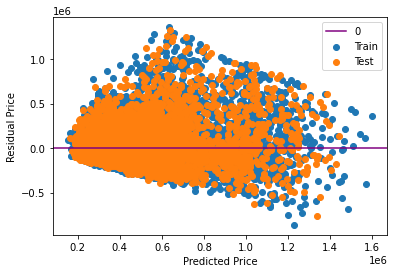

QQ Plot of residuals:


C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly 

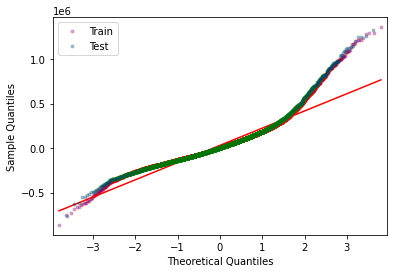

In [145]:
Xftr, Xfte = X_train_scaled[relcol], X_test_scaled[relcol]
trp, tep = linpreds(Xftr, y_train, Xfte)
evaluate(y_train, y_test, trp, tep)

In [953]:
smols(X_test, y_test, cols=relcol).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     875.5
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:02:30   Log-Likelihood:                -2488.7
No. Observations:                7000   AIC:                             4997.
Df Residuals:                    6990   BIC:                             5066.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      12.0818      0.218     55.300      0.000      11.653      12.510
has_basement                0.1459      0.014     10.644      0.000       0.119       0.173
Cond_Good                   0.1301      0.009     14.323      0.000       0.112       0.148
sqft_lot_log               -0.0500      0.005     -9.645      0.000      -0.060      -0.040
bedroom/sqft_living_log    -7.2583      0.498    -14.586      0.000      -8.234      -6.283
bedrooms                    0.9069      0.064     14.111      0.000       0.781       1.033
G_Above_Ave                 0.2206      0.011     20.273      0.000       0.199       0.242
G_Excellent                 0.5949      0.022     27.239      0.000       0.552       0.638
G_Low                      -0.1443      0.015     -9.518      0.000      -0.174      -0.115
sqft_above_log              0.1824      0.029      6.260      0.000       0.125       0.240
==============================================================================
Omnibus:                        4.325   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                4.350
Skew:                           0.054   Prob(JB):                        0.114
Kurtosis:                       2.944   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [954]:
np.exp(0.9069)

2.476633058375575

In [948]:
np.exp(0.9069)

2.476633058375575

In [947]:
np.exp(11.9118+0.9069) - np.exp(11.9118)

220039.97988294598

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?


We recommend Mom & Pop Realty use the grade and condition of the house, the number of bedrooms and the size of the house and size of the property to predict the price of the a clients home. Some limitations of the model include only taking homes up to  $2 million$ in price. If the model is used to evaulate a home that is worth more than $2 million, the model may not produce accurate results. Additionally this model does not take any location information into account. To improve upon his model in the future, we may take into account high values homes and location data.